## Imports

In [13]:
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import argparse

# Define the base path where your pickle file is located
base_path = '/home/bosfab01/SpeakerVerificationBA/pretraining/exp/mask01-base-f128-t2-b24-lr1e-4-m400-pretrain_joint-asli'

## Model Configuration

In [14]:
# Construct the full path to the 'args.pkl' file
args_file_path = os.path.join(base_path, 'args.pkl')

# Load the arguments from the pickle file
with open(args_file_path, 'rb') as f:
    args = pickle.load(f)

# Convert the Namespace to a dictionary if it is of that type
if isinstance(args, argparse.Namespace):
    args_dict = vars(args)
else:
    print("The loaded 'args' object is not an argparse.Namespace. Its type is:", type(args))
    exit()

# Determine the maximum width of the argument names for alignment
max_key_length = max(len(key) for key in args_dict.keys())

# Print the arguments in a structured table format
print(f"{'Argument':<{max_key_length}} | Value")
print("-" * (max_key_length + 3) + "+" + "-" * 30)  # Adjust 30 if you expect wider values

for key, value in args_dict.items():
    print(f"{key:<{max_key_length}} | {value}")

Argument            | Value
----------------------+------------------------------
data_train          | /home/bosfab01/SpeakerVerificationBA/data/audioset2M_librispeech960.json
data_val            | /home/bosfab01/SpeakerVerificationBA/data/audioset_eval.json
data_eval           | None
label_csv           | /home/bosfab01/SpeakerVerificationBA/data/label_information.csv
n_class             | 527
dataset             | asli
dataset_mean        | -3.6925695
dataset_std         | 4.020388
target_length       | 1024
num_mel_bins        | 128
exp_dir             | ./exp/mask01-base-f128-t2-b24-lr1e-4-m400-pretrain_joint-asli
lr                  | 0.0001
warmup              | True
optim               | adam
batch_size          | 24
num_workers         | 16
n_epochs            | 9
lr_patience         | 2
adaptschedule       | False
n_print_steps       | 100
save_model          | True
freqm               | 0
timem               | 0
mixup               | 0.0
bal                 | none
fstride   

## Epochs, Iterations and Time Required

In [15]:
# Construct the full path to the 'progress.pkl' file
progress_file_path = os.path.join(base_path, 'progress.pkl')

# Load the progress from the pickle file
with open(progress_file_path, 'rb') as f:
    progress = pickle.load(f)

# get all information from the progress file
for list in progress:
    print(list)

[1, 4000, 0, 2690.318781375885]
[1, 8000, 0, 5377.989137172699]
[1, 12000, 0, 8064.44074344635]
[1, 16000, 0, 10751.843255758286]
[1, 20000, 0, 13438.874106884003]
[1, 24000, 0, 16126.719381570816]
[1, 28000, 0, 18816.07888531685]
[1, 32000, 0, 21504.43292069435]
[1, 36000, 0, 24193.04987001419]
[1, 40000, 0, 26881.812227010727]
[1, 44000, 0, 29569.951501846313]
[1, 48000, 0, 32258.31678390503]
[1, 52000, 0, 34945.03226399422]
[1, 56000, 0, 37631.24411773682]
[1, 60000, 0, 40318.66826033592]
[1, 64000, 0, 43005.60393619537]
[1, 68000, 0, 45693.41215157509]
[1, 72000, 0, 48377.34129500389]
[1, 76000, 0, 51061.49239182472]
[1, 80000, 0, 53746.98175048828]
[1, 84000, 0, 56431.53063893318]
[2, 88000, 0, 59118.27661061287]
[2, 92000, 0, 61802.07803893089]
[2, 96000, 0, 64485.087446928024]
[2, 100000, 0, 67171.00687289238]
[2, 104000, 0, 69857.15871429443]
[2, 108000, 0, 72542.49261879921]
[2, 112000, 0, 75228.75933480263]
[2, 116000, 0, 77915.05766916275]
[2, 120000, 0, 80600.35691094398]
[

In [16]:
# get the iteration (is at the second position in the list of progress)
iteration = np.array([x[1] for x in progress])
print(iteration)

[  4000   8000  12000  16000  20000  24000  28000  32000  36000  40000
  44000  48000  52000  56000  60000  64000  68000  72000  76000  80000
  84000  88000  92000  96000 100000 104000 108000 112000 116000 120000
 124000 128000 132000 136000 140000 144000 148000 152000 156000 160000
 164000 168000 172000 176000 180000 184000 188000 192000]


## Training and Evaluation Loss

In [17]:
# Construct the full path to the 'result.csv' file
result_file_path = os.path.join(base_path, 'result.csv')

# Load the result from the csv file
result = np.genfromtxt(result_file_path, delimiter=',')

acc_train = result[:, 0] # The first column
loss_train = result[:, 1] # The second column
acc_eval = result[:, 2] # The third column
mse_eval = result[:, 3] # The fourth column

# Define the format for each column
header_format = " {:>5}  | {:<10} | {:<10} | {:<10} | {:<10}"
row_format = "{:>5}k  | {:<10.5f} | {:<10.5f} | {:<10.5f} | {:<10.5f}"

# Print the table headers
print(header_format.format("iter", "acc_train", "loss_train", "acc_eval", "mse_eval"))
print("-" * 60)  # Adjust the total length to fit your headers and column data

# Print each row of data
for i in range(len(acc_train)):
    print(row_format.format(iteration[i] // 1000, acc_train[i], loss_train[i], acc_eval[i], mse_eval[i]))


  iter  | acc_train  | loss_train | acc_eval   | mse_eval  
------------------------------------------------------------
    4k  | 0.03236    | 6.55856    | 0.11602    | 0.04718   
    8k  | 0.18079    | 4.10453    | 0.17899    | 0.03877   
   12k  | 0.24000    | 3.70113    | 0.21364    | 0.03688   
   16k  | 0.27926    | 3.47886    | 0.24061    | 0.03571   
   20k  | 0.30198    | 3.35673    | 0.26089    | 0.03459   
   24k  | 0.31992    | 3.25051    | 0.27116    | 0.03404   
   28k  | 0.33234    | 3.17550    | 0.28210    | 0.03366   
   32k  | 0.34172    | 3.11965    | 0.28807    | 0.03361   
   36k  | 0.34943    | 3.07685    | 0.29486    | 0.03289   
   40k  | 0.35573    | 3.03765    | 0.30347    | 0.03266   
   44k  | 0.36304    | 2.99690    | 0.30687    | 0.03268   
   48k  | 0.36842    | 2.96754    | 0.31099    | 0.03231   
   52k  | 0.37223    | 2.94176    | 0.31674    | 0.03201   
   56k  | 0.37694    | 2.91867    | 0.31957    | 0.03191   
   60k  | 0.38068    | 2.89409    | 0.3

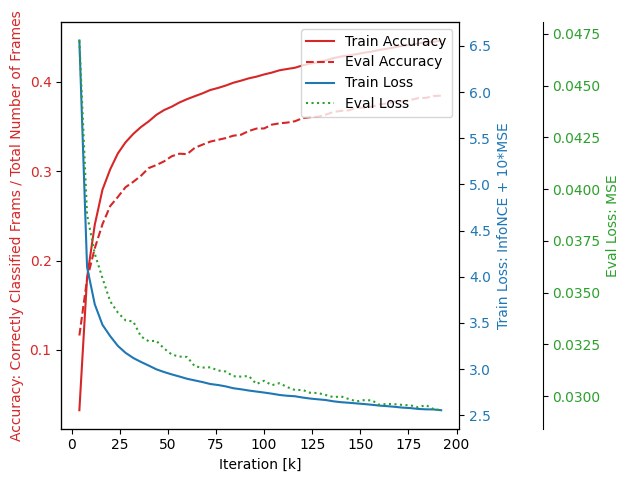

In [19]:
fig, ax1 = plt.subplots()

color_train = 'tab:red'
ax1.set_xlabel('Iteration [k]')
ax1.set_ylabel('Accuracy: Correctly Classified Frams / Total Number of Frames', color=color_train)
line1, = ax1.plot(iteration/1e3, acc_train, color=color_train, label='Train Accuracy')
line2, = ax1.plot(iteration/1e3, acc_eval, color=color_train, linestyle='dashed', label='Eval Accuracy')
ax1.tick_params(axis='y', labelcolor=color_train)

ax2 = ax1.twinx()
color_loss = 'tab:blue'
ax2.set_ylabel('Train Loss: InfoNCE + 10*MSE', color=color_loss)
line3, = ax2.plot(iteration/1e3, loss_train, color=color_loss, label='Train Loss')
ax2.tick_params(axis='y', labelcolor=color_loss)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax3
color_eval_loss = 'tab:green'
ax3.set_ylabel('Eval Loss: MSE', color=color_eval_loss)
line4, = ax3.plot(iteration/1e3, mse_eval, color=color_eval_loss, linestyle='dotted', label='Eval Loss')
ax3.tick_params(axis='y', labelcolor=color_eval_loss)

# Collect all lines and labels for the legend
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]

# Place a single legend on the plot
ax1.legend(lines, labels, loc='upper right')

fig.tight_layout()
plt.show()